Notebook to investigate raw FinBERT predictions (excluding results of Granger Causality & OLS, see \notebooks\exploratory_analysis_regression_results.ipnyb)

In [2]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools
import datetime as dt
import sqlite3
from collections import defaultdict

# connect to folder for custom functions
root = Path.cwd().parent
vis_path = root / "src" / "visualizations" 
mod_path = root / "src" / "modelling" 
sys.path.append(str(vis_path))
sys.path.append(str(mod_path))

from read_articles import read, investigate_hype_articles
from plot_functions import plot_aini_series_subplots, plot_aini_hist_grid_by_years
from compute_extrema import compute_aini_extrema
from calculate_summary_statistics import calculate_aini_statistics

In [3]:
# prepare paths
var_path = root / "data" / "processed" / "variables"
art_path = root / "data" / "processed" / "articles"
table_path = root / "reports" / "tables"
fig_path = root / "reports" / "figures"

# load aini data
aini_custom = pd.read_csv(var_path / "binary_AINI_variables.csv")
aini_w0 = pd.read_csv(var_path / "w0_AINI_variables.csv")
aini_w1 = pd.read_csv(var_path / "w1_AINI_variables.csv")
aini_w2 =  pd.read_csv(var_path / "w2_AINI_variables.csv")


In [ ]:
# create dataframes for visualizaions
normalized_AINI = pd.DataFrame()

# ensure sorting
aini_w0 = aini_w0.sort_values("date")
aini_w1 = aini_w1.sort_values("date")
aini_w2 = aini_w2.sort_values("date")
aini_custom = aini_custom.sort_values("date")

# compute extrema
merged, tidy, pivot, extrema = compute_aini_extrema(aini_w0,aini_w1,aini_w2,aini_custom,exclude_dates=["2023-07-15","2023-06-30"])
merged

c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:104: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tidy.pivot_table(
c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tidy.groupby(["type", "date"])
c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:123: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

In [5]:
# show extrema
extrema.sort_values("n measures",ascending=False)

,type,date,n measures,measure
0,minimum,2025-02-06,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
12,maximum,2025-06-07,3,"normalized_AINI_w0, EMA_02_w0, EMA_08_w0"
13,maximum,2025-06-16,3,"normalized_AINI_w2, EMA_02_w2, EMA_08_w2"
11,maximum,2023-04-01,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
4,minimum,2025-01-31,2,"EMA_02_w1, EMA_02_w2"
1,minimum,2023-08-13,2,"normalized_AINI_w0, EMA_08_w0"
14,maximum,2025-06-10,2,"normalized_AINI_w1, EMA_08_w1"
3,minimum,2025-01-28,2,"normalized_AINI_w1, EMA_08_w1"
2,minimum,2024-08-02,2,"normalized_AINI_w2, EMA_08_w2"
5,minimum,2025-01-20,1,EMA_02_w0


Explore differences in min, max, mean and std. of AINI variables

In [6]:
stats = calculate_aini_statistics(merged)
stats.to_html(table_path / "AINI_summary_statistics.html")
stats

,scope,variable,count,mean,std,min,median,max
0,Total,EMA_02_custom,779,-0.087649,0.031978,-0.284651,-0.086231,0.000000
1,Total,EMA_02_w0,779,-0.000683,0.019049,-0.068745,0.000057,0.058285
2,Total,EMA_02_w1,779,-0.004571,0.023188,-0.109569,-0.002387,0.057163
3,Total,EMA_02_w2,779,-0.005765,0.022203,-0.097269,-0.003178,0.069739
4,Total,EMA_08_custom,779,-0.087504,0.063683,-0.456777,-0.081199,0.000000
...,...,...,...,...,...,...,...,...
59,2025,normalized_AINI_w2,141,0.000121,0.069441,-0.208333,0.000000,0.200000
60,2025,simple_AINI_custom,141,-3.106383,3.600996,-26.000000,-2.000000,0.000000
61,2025,simple_AINI_w0,141,0.141844,1.895791,-5.000000,0.000000,7.000000
62,2025,simple_AINI_w1,141,0.078014,2.324008,-8.000000,0.000000,8.000000


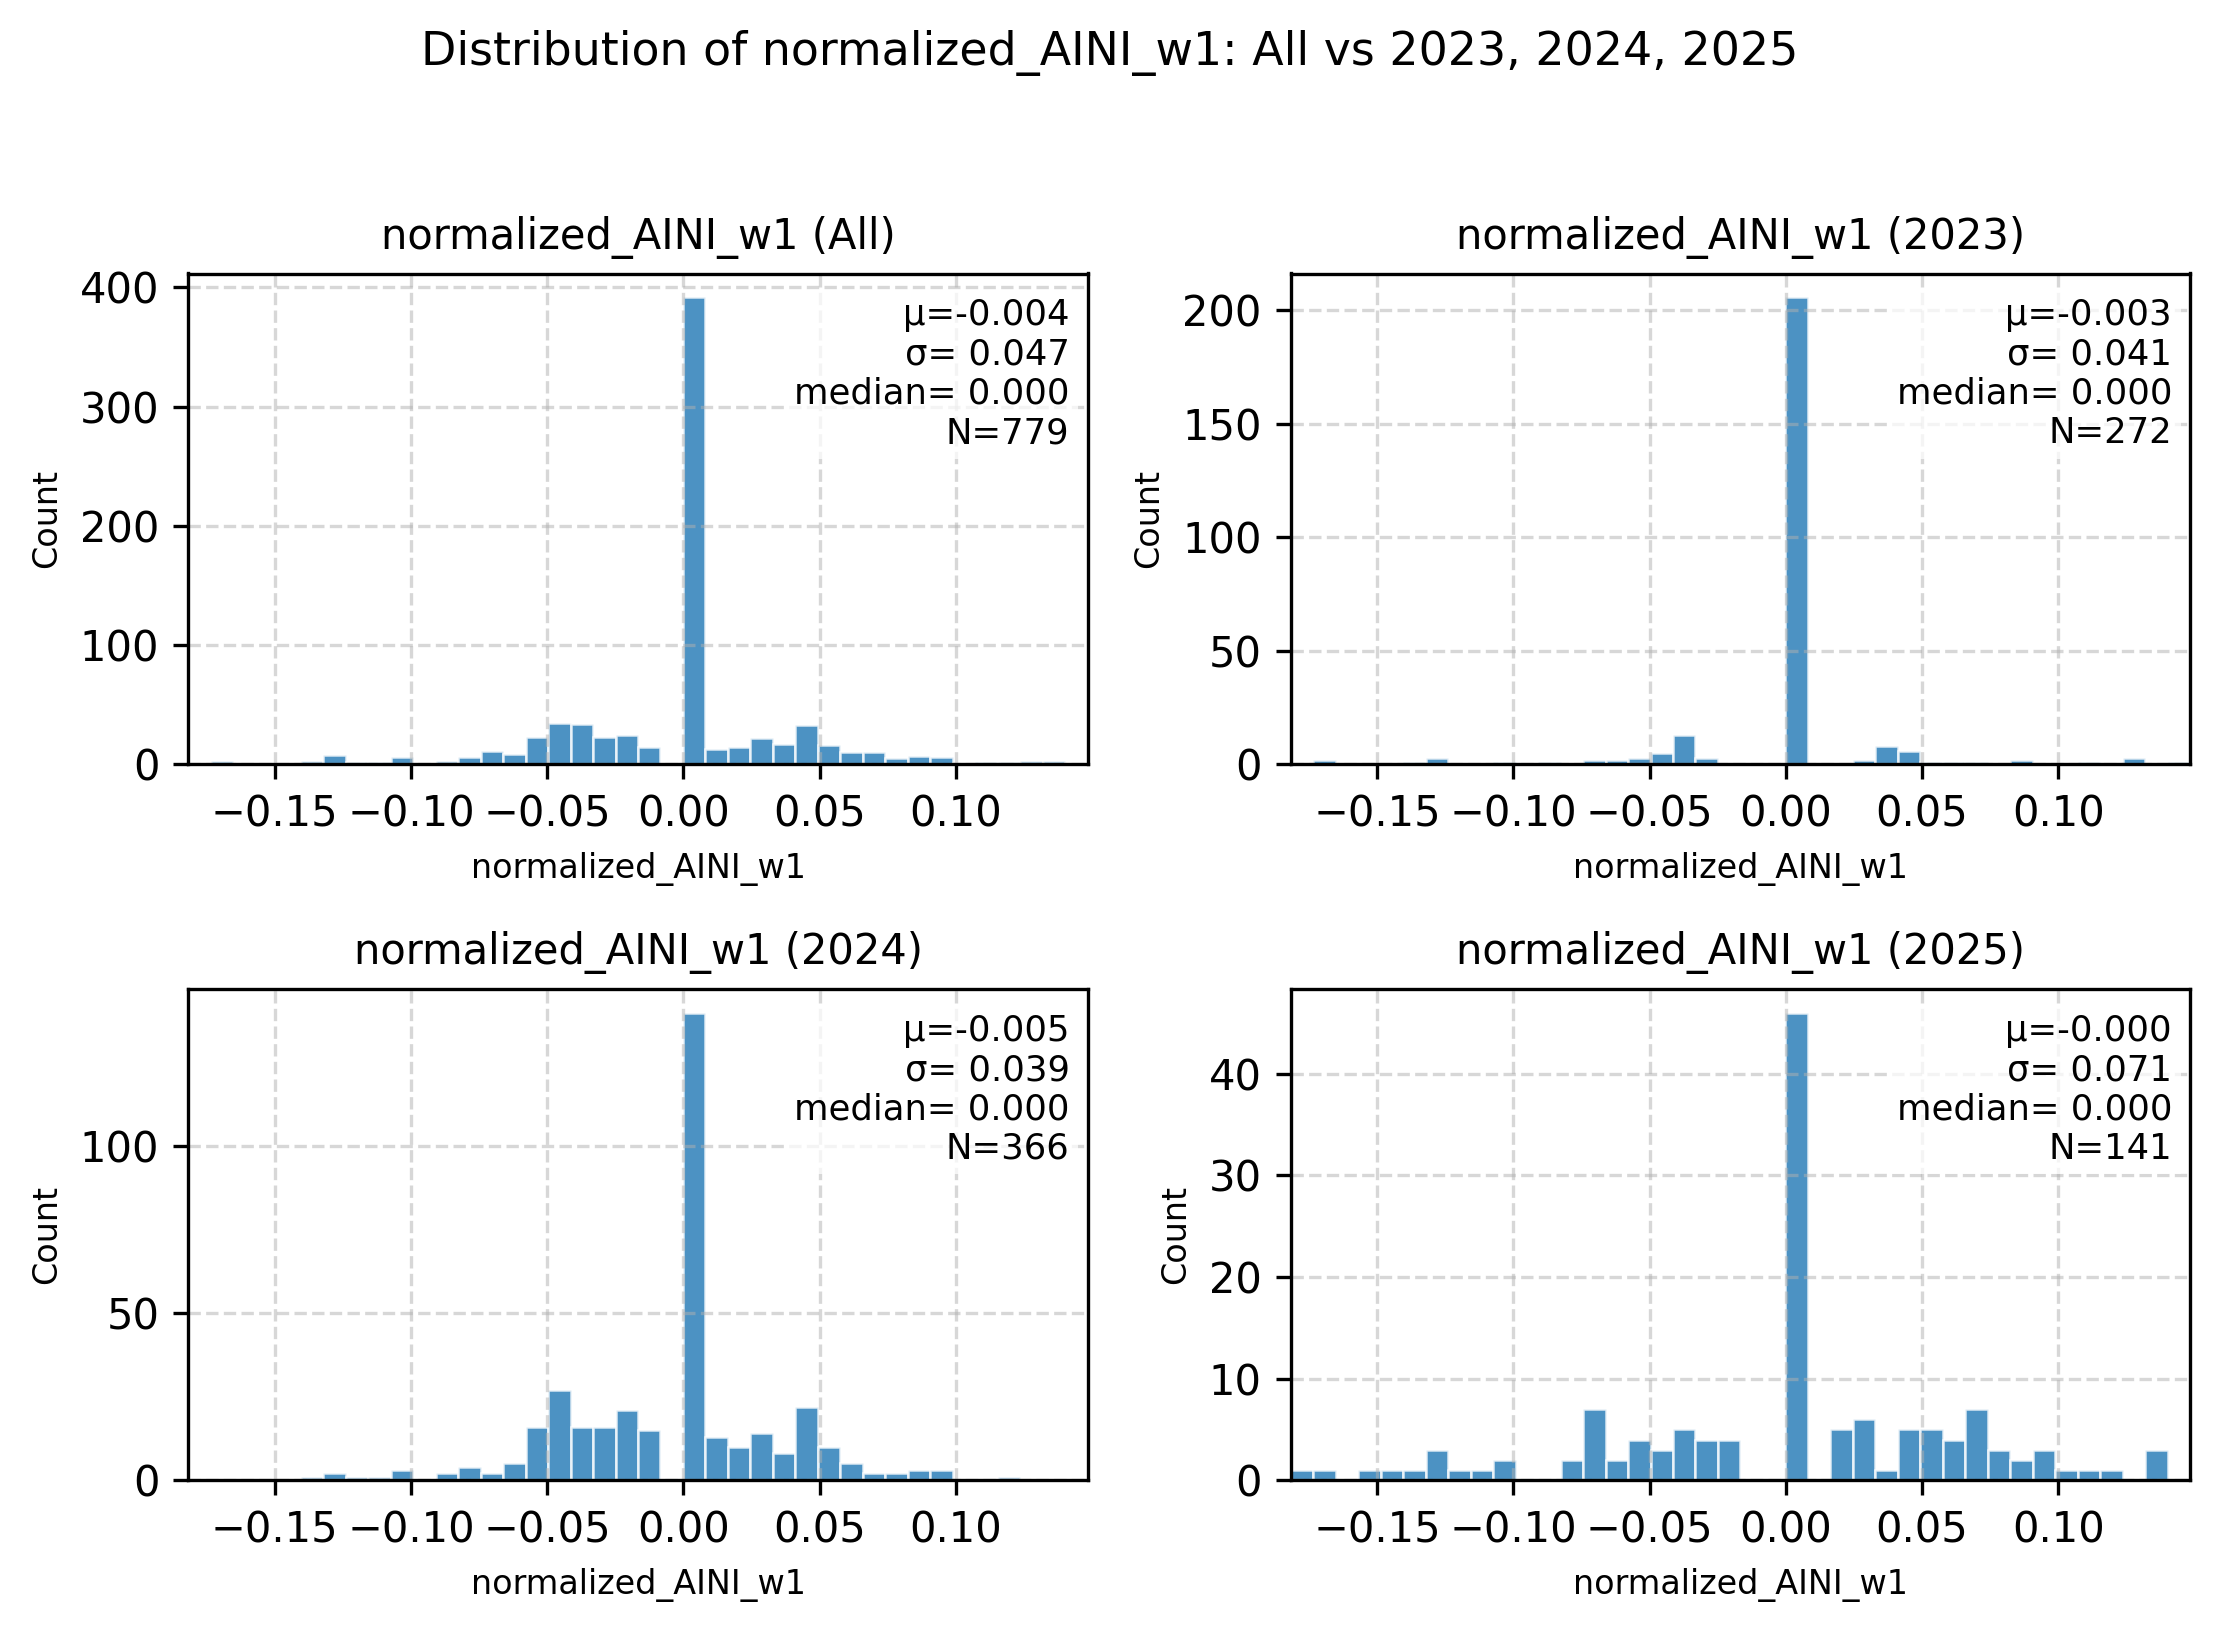

In [7]:
# plot distribution, ignoring raw counts due to unequal count of articles / day
vars = ["EMA_02_w0"] 
outpath_hist = fig_path / "aini_hist_w1_panels.png"

plot_aini_hist_grid_by_years(
            df = merged,
            outpath= outpath_hist
        )


In [8]:
# write to csv
extrema.to_csv(table_path / "aini_extrema.csv")

In [9]:
# Convert to LaTeX with booktabs, tabular (single-page), wrapped in adjustbox
latex_table = extrema.to_latex(
    index=False,
    escape=True,
    column_format="l" + "c" * (len(extrema.columns) - 1),
    bold_rows=False
)

# Add booktabs spacing
latex_table = latex_table.replace("\\toprule", "\\toprule\n\\addlinespace")
latex_table = latex_table.replace("\\midrule", "\\midrule\n\\addlinespace")
latex_table = latex_table.replace("\\bottomrule", "\\addlinespace\n\\bottomrule")

# Wrap in table + adjustbox
latex_wrapped = (
    "\\begin{table}[!htbp]\n"
    "\\centering\n"
    "\\begin{adjustbox}{width=\\textwidth}\n"
    + latex_table +
    "\\end{adjustbox}\n"
    "\\caption{AINI extrema}\n"
    "\\label{tab:aini_extrema}\n"
    "\\end{table}\n"
)

# Save to file
output_path = table_path / "aini_extrema.tex"
with open(output_path, "w") as f:
    f.write(latex_wrapped)

Calculate weekly extrema (by calendar week)

In [10]:
# derive calendar week (ISO year + week number)
tidy["week"] = tidy["date"].dt.to_period("W").apply(lambda r: r.start_time)

# Count how often each min/max week occurs
counts_by_week = (
    tidy.groupby(["type", "week"])
        .size()
        .reset_index(name="count")
        .sort_values(["type", "count"], ascending=[True, False])
)

# subset n > 0
extrema_weekly = counts_by_week[counts_by_week["count"] > 0]

# collect variables for each week
week_dict = (
    tidy.groupby(["week"])["variable"]
    .apply(list)
    .to_dict()
)

# attach variables to each week
extrema_weekly["measure"] = extrema_weekly["week"].map(week_dict)

# bring into convenient format
extrema_weekly_clean = extrema_weekly.copy()

# week start (Monday)
week_start = extrema_weekly_clean["week"]
# week end (Sunday) = start + 6 days
week_end = week_start + pd.Timedelta(days=6)

# format as "dd.mm.yyyy - dd.mm.yyyy"
extrema_weekly_clean["week"] = (
    week_start.dt.strftime("%d.%m.%Y") + " - " + week_end.dt.strftime("%d.%m.%Y")
)

extrema_weekly_clean["type"] = extrema_weekly_clean["type"].replace({"min": "minimum", "max": "maximum"})
extrema_weekly_clean.rename(columns={"count": "n measures"}, inplace=True)

# save
extrema_weekly_clean.to_csv(table_path / "aini_weekly_extrema.csv", index=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_19988\2630997574.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tidy.groupby(["type", "week"])
C:\Users\PC\AppData\Local\Temp\ipykernel_19988\2630997574.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extrema_weekly["measure"] = extrema_weekly["week"].map(week_dict)
C:\Users\PC\AppData\Local\Temp\ipykernel_19988\2630997574.py:38: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the

In [11]:
# Convert to LaTeX with booktabs, tabular (single-page), wrapped in adjustbox
latex_table = extrema_weekly_clean.to_latex(
    index=False,
    escape=True,
    column_format="l" + "c" * (len(extrema_weekly_clean.columns) - 1),
    bold_rows=False
)

# Add booktabs spacing
latex_table = latex_table.replace("\\toprule", "\\toprule\n\\addlinespace")
latex_table = latex_table.replace("\\midrule", "\\midrule\n\\addlinespace")
latex_table = latex_table.replace("\\bottomrule", "\\addlinespace\n\\bottomrule")

# Wrap in table + adjustbox
latex_wrapped = (
    "\\begin{table}[!htbp]\n"
    "\\centering\n"
    "\\begin{adjustbox}{width=\\textwidth}\n"
    + latex_table +
    "\\end{adjustbox}\n"
    "\\caption{AINI extrema}\n"
    "\\label{tab:aini_extrema}\n"
    "\\end{table}\n"
)

# Save to file
output_path = table_path / "aini_extrema_weekly.tex"
with open(output_path, "w") as f:
    f.write(latex_wrapped)

In [12]:
extrema_weekly_clean.sort_values("n measures",ascending=False)

,type,week,n measures,measure
4,minimum,27.01.2025 - 02.02.2025,4,"[normalized_AINI_w1, EMA_02_w1, EMA_08_w1, EMA..."
5,minimum,03.02.2025 - 09.02.2025,3,"[normalized_AINI_custom, EMA_02_custom, EMA_08..."
10,maximum,27.03.2023 - 02.04.2023,3,"[normalized_AINI_custom, EMA_02_custom, EMA_08..."
17,maximum,02.06.2025 - 08.06.2025,3,"[normalized_AINI_w0, EMA_02_w0, EMA_08_w0]"
19,maximum,16.06.2025 - 22.06.2025,3,"[normalized_AINI_w2, EMA_02_w2, EMA_08_w2]"
1,minimum,07.08.2023 - 13.08.2023,2,"[normalized_AINI_w0, EMA_08_w0]"
2,minimum,29.07.2024 - 04.08.2024,2,"[normalized_AINI_w2, EMA_08_w2]"
18,maximum,09.06.2025 - 15.06.2025,2,"[normalized_AINI_w1, EMA_08_w1]"
3,minimum,20.01.2025 - 26.01.2025,1,[EMA_02_w0]
16,maximum,17.03.2025 - 23.03.2025,1,[EMA_02_w1]


load data with AINI predictions & compare corpora with maxima and minima

In [13]:
# load & merge w1 data custom finbert data
c_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_on_binary.csv")
c_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_on_binary.csv")
c_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_on_binary.csv")
c_df = pd.concat([c_df23,c_df24,c_df25]) 

# load & merge w0 data
w0_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_0.csv")
w0_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_0.csv")
w0_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_0.csv")
w0_df = pd.concat([w0_df23,w0_df24,w0_df25]) 

# load & merge w1 data
w1_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_1.csv")
w1_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_1.csv")
w1_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_1.csv")
w1_df = pd.concat([w1_df23,w1_df24,w1_df25]) 

# merge on normalized_aini_wo to identify relevant articles
w2_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_2.csv")
w2_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_2.csv")
w2_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_2.csv")
w2_df = pd.concat([w2_df23,w2_df24,w2_df25]) 

# create df list 
aini_dfs = [c_df,w0_df,w1_df,w2_df]


In [14]:
# verify integrity 
for df in aini_dfs:
    print(
        f"\nFirst entry (date): {df['date'].min()} "
        f"\nLast entry (date): {df['date'].max()} "
        f"\n# entries: {len(df)} "
        f"\n# non-unique article_id: {df['article_id'].duplicated().sum()} "
        f"\n# unique article_id: {df['article_id'].nunique()} " 
        f"\nMin article_id: {df['article_id'].min()} "
        f"\nMax article_id: {df['article_id'].max()} "
        f"\nColumns: {list(df.columns)}\n"
    )



First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 21886 
# non-unique article_id: 0 
# unique article_id: 21886 
Min article_id: 20251 
Max article_id: 202437460 
Columns: ['article_id', 'image_src', 'scanned_time', 'title', 'sub_title', 'corpus', 'index_id', 'id', 'date', 'link', 'section', 'cleaned_corpus', 'ai_window', 'predicted_label', 'predicted_class', 'ai_relevant', 'sentiment_label', 'sentiment_score', 'hype_score']


First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 22904 
# non-unique article_id: 0 
# unique article_id: 22904 
Min article_id: 20251 
Max article_id: 202437460 
Columns: ['article_id', 'image_src', 'scanned_time', 'title', 'sub_title', 'corpus', 'index_id', 'id', 'date', 'link', 'section', 'cleaned_corpus', 'text', 'ai_window', 'ai_relevant', 'sentiment_label', 'sentiment_score', 'hype_score']


First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 22904 
# non-unique article_id: 0 
# unique a

In [15]:
# investigate duplicates in article ids
dups = w0_df[w0_df[["article_id", "title"]].duplicated(keep=False)].sort_values("article_id")
dups

,article_id,image_src,scanned_time,title,sub_title,corpus,index_id,id,date,link,section,cleaned_corpus,text,ai_window,ai_relevant,sentiment_label,sentiment_score,hype_score


In [16]:
# subset for relevant columns
rel_col = ["date","article_id","sentiment_label","hype_score"]
clean_df = []

for df in aini_dfs:
    df = df[rel_col].copy()
    clean_df.append(df)
    
# unpack supsetted dataframes containing Finbert AINI estimates    
c_df_sub,w0_df_sub,w1_df_sub,w2_df_sub = clean_df
w2_df_sub

,date,article_id,sentiment_label,hype_score
0,2023-01-10,202336,neutral,0
1,2023-01-10,202339,neutral,0
2,2023-01-12,202387,neutral,0
3,2023-01-12,2023102,neutral,0
4,2023-01-13,2023111,neutral,0
...,...,...,...,...
4055,2025-06-16,20254120,neutral,0
4056,2025-06-16,20254121,neutral,0
4057,2025-06-16,20254122,neutral,0
4058,2025-06-16,20254123,neutral,0


In [17]:
# verify integrity 
for df in clean_df:
    print(
        f"First entry (date): {df['date'].min()} "
        f"\nLast entry (date): {df['date'].max()} "
        f"\n# entries: {len(df)} "
        f"\n# non-unique article_id: {df['article_id'].duplicated().sum()} "
        f"\nColumns: {list(df.columns)}\n"
    )


First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 21886 
# non-unique article_id: 0 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 22904 
# non-unique article_id: 0 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 22904 
# non-unique article_id: 0 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 
Last entry (date): 2025-06-16 
# entries: 22904 
# non-unique article_id: 0 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']



Combine AINI predictions to investigate minima & maxima

In [18]:
# harmonize ids
w0 = w0_df_sub.copy()
w1 = w1_df_sub.copy()
w2 = w2_df_sub.copy()
c  = c_df_sub.copy()

# bring to datetime, normalize to 00:00:00
for df in (w0, w1, w2, c):
    df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.normalize()

# left join
complete_left = w0.copy()
complete_left = complete_left.merge(
    w1, on="article_id", how="left", suffixes=("", "_w1"), validate="one_to_one"
)
complete_left = complete_left.merge(
    w2, on="article_id", how="left", suffixes=("", "_w2"), validate="one_to_one"
)
complete_left = complete_left.merge(
    c,  on="article_id", how="left", suffixes=("", "_c"),  validate="one_to_one"
)

# control: outer join
complete_outer = w0.merge(
    w1, on="article_id", how="outer", suffixes=("", "_w1"), validate="one_to_one"
)
complete_outer = complete_outer.merge(
    w2, on="article_id", how="outer", suffixes=("", "_w2"), validate="one_to_one"
)
complete_outer = complete_outer.merge(
    c,  on="article_id", how="outer", suffixes=("", "_c"),  validate="one_to_one"
)


# compare joins
print("[LEFT] n observations:", len(complete_left))
print("[OUTER] n observations:", len(complete_outer))

[LEFT] n observations: 22904
[OUTER] n observations: 22904


In [19]:
# columns to bring over from w1_df
keep = ["article_id", "title", "sub_title","section", "cleaned_corpus", "date","ai_window"]

# subset + clean IDs on the right side
for_texts = w1_df.loc[:, keep].copy()
for_texts["article_id"] = (
    for_texts["article_id"]
    .astype(str)
    .str.replace(r"[\u200b\u200c\u200d\ufeff]", "", regex=True)  # zero-width + BOM
    .str.strip()
)

# ensure right side has unique keys 
for_texts = for_texts.drop_duplicates(subset="article_id", keep="first")

# clean IDs on the left
complete_left = complete_left.copy()
complete_left["article_id"] = (
    complete_left["article_id"]
    .astype(str)
    .str.replace(r"[\u200b\u200c\u200d\ufeff]", "", regex=True)
    .str.strip()
)

# merge (left join)
complete_df = complete_left.merge(
    for_texts,
    how="left",
    on="article_id",
    suffixes=("", "_t"),
    validate="one_to_one",  # will raise if either side still has duplicate keys
)

# validate join
print("[COMPLETE] n observations:", len(complete_df))

# rename for consistency
complete_df = complete_df.rename(columns={"hype_score": "hype_score_w0"})

[COMPLETE] n observations: 22904


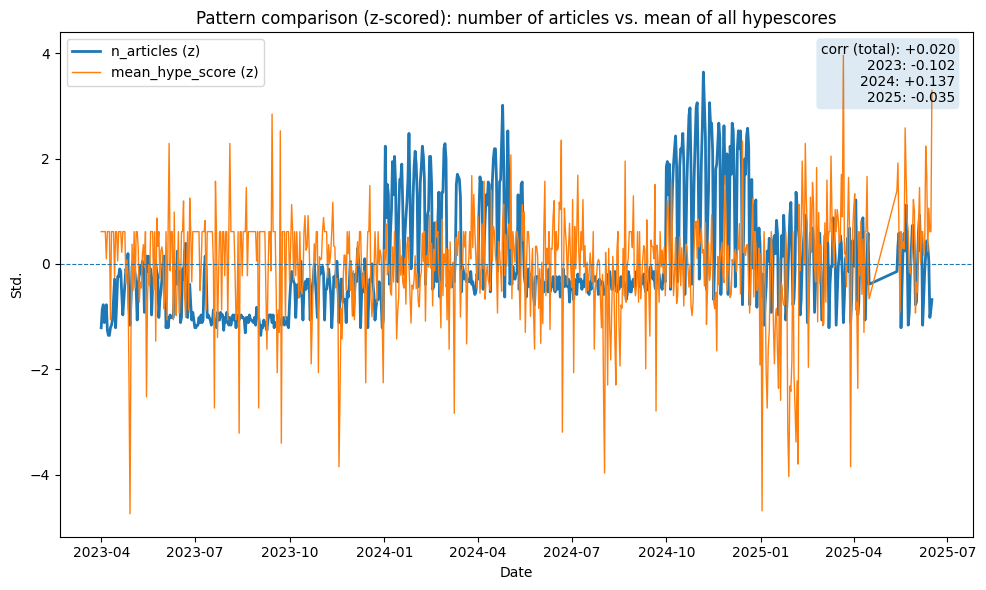

In [ ]:
# define noisy dates 
exclude_dates=["2023-07-15","2023-06-30"]

# subset to exclude noise
complete_df = complete_df[~complete_df["date"].isin(pd.to_datetime(exclude_dates))]

# define relevant columns
hype_cols = ["hype_score_w0", "hype_score_w1", "hype_score_w2", "hype_score_c"]

# compute row-wise mean across all hype scores (per article)
complete_df["hype_score_mean"] = complete_df[hype_cols].mean(axis=1)

# aggregate to date level: count articles and mean of the row-wise mean
complete_df["date"] = pd.to_datetime(complete_df["date"], errors="coerce")
complete_agg = (
    complete_df.groupby("date", as_index=False)
    .agg(
        n_articles=("article_id", "count"),
        mean_hype_score=("hype_score_mean", "mean")
    )
)

# subset to exclude data prior 01.04.2023
cutoff = dt.datetime(2023, 4, 1)
complete_agg = complete_agg[complete_agg["date"] >= cutoff]

# prepare dataframe for plotting
dfp = complete_agg.set_index("date").copy()

# z-score helper that avoids div-by-zero
def zscore(s: pd.Series) -> pd.Series:
    mu = s.mean()
    sd = s.std()
    if pd.isna(sd) or sd == 0:
        return s * 0  # all zeros if no variation
    return (s - mu) / sd

# z-score series
dfp["n_articles_z"] = zscore(dfp["n_articles"])
dfp["mean_hype_score_z"] = zscore(dfp["mean_hype_score"])

# total corr
r_total = float(dfp["n_articles_z"].corr(dfp["mean_hype_score_z"]))

# yearly corrs
yearly_corrs = {}
for y, g in dfp.groupby(dfp.index.year):
    if len(g) >= 2:
        yearly_corrs[int(y)] = float(g["n_articles_z"].corr(g["mean_hype_score_z"]))
    else:
        yearly_corrs[int(y)] = np.nan

# build annotation text
lines = [f"corr (total): {r_total:+.3f}"]
for y in sorted(yearly_corrs):
    r = yearly_corrs[y]
    lines.append(f"{y}: {r:+.3f}" if np.isfinite(r) else f"{y}: n/a")
anno_text = "\n".join(lines)

# plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dfp.index, dfp["n_articles_z"], linewidth=2, label="n_articles (z)")
ax.plot(dfp.index, dfp["mean_hype_score_z"], linewidth=1, label="mean_hype_score (z)")

ax.axhline(0, linestyle="--", linewidth=0.8)
ax.set_title("Pattern comparison (z-scored): number of articles vs. mean of all hypescores")
ax.set_xlabel("Date")
ax.set_ylabel("Std.")
ax.legend(loc="upper left", ncol=1)

# annotation box (upper right inside axes)
ax.text(
    0.98, 0.98, anno_text,
    transform=ax.transAxes,
    ha="right", va="top",
    fontsize=10,
    bbox=dict(boxstyle="round", alpha=0.15, edgecolor="none")
)

fig.tight_layout()
plt.show()

Investigate yearly correlation between raw hype scores & number of articles

In [56]:
# define hype cols present
hcols_present = [c for c in hype_cols if c in complete_df.columns]

# aggregate to date level: counts + daily means for each hype variant
complete_agg = (
    complete_df.groupby("date", as_index=False)
    .agg(
        n_articles=("article_id", "count"),
        **{f"{c}_mean": (c, "mean") for c in hcols_present},
        mean_hype_score=("hype_score_mean", "mean")  
    )
)

# build dfp
dfp = complete_agg.set_index("date").copy()

# z-score
dfp["n_articles_z"] = zscore(dfp["n_articles"])
for c in hcols_present:
    dfp[f"{c}_mean_z"] = zscore(dfp[f"{c}_mean"])

# total correlations
total_corrs = {c: float(dfp["n_articles_z"].corr(dfp[f"{c}_mean_z"])) for c in hcols_present}

# yearly correlations
corr_by_year = (
    dfp.assign(year=dfp.index.year)
       .groupby("year")
       .apply(lambda g: pd.Series({
           c: float(g["n_articles_z"].corr(g[f"{c}_mean_z"])) if len(g) >= 2 else np.nan
           for c in hcols_present
       }))
       .sort_index()
)

# append total row
corr_by_year.loc["total"] = pd.Series(total_corrs)

print(corr_by_year.round(3)) 

# subset for reporting
n_articles_df = complete_agg.loc[:, ["date", "n_articles"]].copy()

# save as scv
n_articles_df.to_csv(var_path / "n_articles.csv")

       hype_score_w0  hype_score_w1  hype_score_w2  hype_score_c
year                                                            
2023          -0.000         -0.004         -0.037         0.034
2024           0.032          0.087          0.120         0.112
2025           0.059          0.090          0.111        -0.330
total          0.045          0.044          0.067        -0.021


C:\Users\PC\AppData\Local\Temp\ipykernel_19988\3522836586.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


Compute correlation between n articles & processed AINI values

In [37]:
MEASURE_COLS = [
    "normalized_AINI_w0", "EMA_02_w0", "EMA_08_w0",
    "normalized_AINI_w1",  "EMA_02_w1", "EMA_08_w1",
    "normalized_AINI_w2", "EMA_02_w2", "EMA_08_w2",
    "normalized_AINI_custom", "EMA_02_custom", "EMA_08_custom",
]

merged_df = merged.copy()

merged_df = merged_df.copy()
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")
merged_df = merged_df.dropna(subset=["date"])
present_measures = [c for c in MEASURE_COLS if c in merged_df.columns]

n_base = complete_agg[["date", "n_articles"]].copy()

# join measures with n_articles on date 
m = (
    merged_df[["date"] + present_measures]
    .merge(n_base, on="date", how="inner")
    .sort_values("date")
)

# verify integrity
m.head()
print(f"Number of measures {m.shape[0]}",
      f"\n First datapoint: {min(m.date)}",
      f"\n Last datapoint: {max(m.date)}",
      f"\n Duplicates: {m['date'].duplicated().sum()}")

Number of measures 779 
 First datapoint: 2023-04-01 00:00:00 
 Last datapoint: 2025-06-16 00:00:00 
 Duplicates: 0


In [38]:
# helper for correlations
def _corr_block(g: pd.DataFrame, measures) -> pd.Series:
    out = {}
    for c in measures:
        if g[c].notna().sum() >= 2 and g["n_articles"].notna().sum() >= 2:
            out[c] = float(g["n_articles"].corr(g[c]))
        else:
            out[c] = np.nan
    return pd.Series(out)

# add year column
m["year"] = m["date"].dt.year

# compute by year
corr_by_year = m.groupby("year", dropna=True).apply(lambda g: _corr_block(g, present_measures))

# add total row
corr_by_year.loc["total"] = _corr_block(m, present_measures)

# pretty output
corr_by_year_rounded = corr_by_year.round(3)
print(corr_by_year_rounded)

       normalized_AINI_w0  EMA_02_w0  EMA_08_w0  normalized_AINI_w1  \
year                                                                  
2023               -0.039     -0.091     -0.045              -0.054   
2024                0.032      0.039      0.035               0.087   
2025                0.059     -0.022      0.063               0.090   
total               0.029      0.048      0.035               0.031   

       EMA_02_w1  EMA_08_w1  normalized_AINI_w2  EMA_02_w2  EMA_08_w2  \
year                                                                    
2023      -0.059     -0.046              -0.125     -0.116     -0.127   
2024       0.162      0.100               0.120      0.212      0.137   
2025      -0.044      0.076               0.111     -0.019      0.108   
total      0.034      0.036               0.057      0.081      0.065   

       normalized_AINI_custom  EMA_02_custom  EMA_08_custom  
year                                                         
2023      

C:\Users\PC\AppData\Local\Temp\ipykernel_19988\3378966710.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_year = m.groupby("year", dropna=True).apply(lambda g: _corr_block(g, present_measures))


Investigate extrema manually

In [43]:
# exclude 0 values
extrema = extrema[extrema["n measures"] > 0]

# again display extrema to define minima & maxima
extrema.sort_values(["type","n measures"],ascending=(False,False))

,type,date,n measures,measure
11,maximum,2023-04-01,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
12,maximum,2025-06-07,3,"normalized_AINI_w0, EMA_02_w0, EMA_08_w0"
13,maximum,2025-06-16,3,"normalized_AINI_w2, EMA_02_w2, EMA_08_w2"
14,maximum,2025-06-10,2,"normalized_AINI_w1, EMA_08_w1"
15,maximum,2025-03-22,1,EMA_02_w1
0,minimum,2025-02-06,3,"normalized_AINI_custom, EMA_02_custom, EMA_08_..."
1,minimum,2023-08-13,2,"normalized_AINI_w0, EMA_08_w0"
2,minimum,2024-08-02,2,"normalized_AINI_w2, EMA_08_w2"
3,minimum,2025-01-28,2,"normalized_AINI_w1, EMA_08_w1"
4,minimum,2025-01-31,2,"EMA_02_w1, EMA_02_w2"


In [44]:
# cutoffs for maxima 
max_1_custom  = pd.Timestamp("2025-04-01")  # n = 2 normalized_AINI_custom, EMA_02_custom, EMA_08_custom
max_1_w0 = pd.Timestamp("2025-06-07")  # n = 3 normalized_AINI_w0, EMA_02_w0, EMA_08_w0
max_1_w1 = pd.Timestamp("2025-06-10")  # n = 2 normalized_AINI_w1, EMA_08_w1            
max_1_w2 = pd.Timestamp("2025-06-16")  # n = 3 normalized_AINI_w2, EMA_02_w2, EMA_08_w2

# subset for maxima
art_max_1_custom  = complete_df[complete_df["date"] == max_1_custom]
art_max_1_w0 = complete_df[complete_df["date"] == max_1_w0]
art_max_1_w1 = complete_df[complete_df["date"] == max_1_w1]
art_max_1_w2 = complete_df[complete_df["date"] == max_1_w2]

# cutoffs for minima
min_1_custom  = pd.Timestamp("2025-02-06")  # n = 3 normalized_AINI_custom, EMA_02_custom, EMA_08_custom
min_2_w0 = pd.Timestamp("2023-08-13")  # n = 2 normalized_AINI_w0, EMA_08_w0
min_2_w1  = pd.Timestamp("2025-01-28")  # n = 2 normalized_AINI_w1, EMA_08_w1
min_2_w2  = pd.Timestamp("2024-08-02")  # n = 2 normalized_AINI_w2, EMA_08_w2
min_2_w1_w2 = pd.Timestamp("2025-01-31")  # n = 2 MA_02_w1, EMA_02_w2 => only mixed!

# subset for minima
art_min_1_custom  = complete_df[complete_df["date"] == min_1_custom]
art_min_2_w0 = complete_df[complete_df["date"] == min_2_w0]
art_min_2_w1 = complete_df[complete_df["date"] == min_2_w1]
art_min_2_w2 = complete_df[complete_df["date"] == min_2_w2]
art_min_2_w1_w2 = complete_df[complete_df["date"] == min_2_w1_w2]


# check n of observations
for name, df in [
    ("art_min_1_custom", art_min_1_custom),
    ("art_min_2_w0", art_min_2_w0),
    ("art_min_2_w1", art_min_2_w1),
    ("art_min_2_w2", art_min_2_w2),
    ("art_min_2_w1_w2", art_min_2_w1_w2),
    ("art_max_1_custom", art_max_1_custom),
    ("art_max_1_w0", art_max_1_w0),
    ("art_max_1_w1", art_max_1_w1),
    ("art_max_1_w2", art_max_1_w2),
]:
    print(f"{name}: {len(df)}")

# quick sanity check on columns
print(art_min_1_custom.columns)


art_min_1_custom: 44
art_min_2_w0: 7
art_min_2_w1: 36
art_min_2_w2: 19
art_min_2_w1_w2: 33
art_max_1_custom: 32
art_max_1_w0: 5
art_max_1_w1: 33
art_max_1_w2: 15
Index(['date', 'article_id', 'sentiment_label', 'hype_score_w0', 'date_w1',
       'sentiment_label_w1', 'hype_score_w1', 'date_w2', 'sentiment_label_w2',
       'hype_score_w2', 'date_c', 'sentiment_label_c', 'hype_score_c', 'title',
       'sub_title', 'section', 'cleaned_corpus', 'date_t', 'ai_window',
       'hype_score_mean'],
      dtype='object')


In [45]:
# save extrema for reporting
extrema.sort_values(["type","n measures"],ascending=(False,False)).to_csv(var_path/ "extrema.csv")

In [29]:
read(articles_min1)
articles_min1

Title   : Tech Giants Double Down on Their Massive AI Spending
Date    : 2025-02-06 00:00:00
Section : tech
Scores  : hype_score_w0=-1, hype_score_w1=0, hype_score_w2=1, hype_score_c=-1.0
--------------------------------------------------------------------------------
tech giants double down on their massive ai spending amazon,. google,. microsoft and. meta pour
billions into artificial intelligence, undeterred by. deepseek ' s rise 2 min. capital spending,
quarterly 75 50 25 0 ' 21 ' 22 ' 23 ' 24. tech giants projected tens of billions of dollars in
increased investment this year and sent a stark message about their plans for. ai. we ' re just
getting started.
Article 1 of 24
Title   : Naver Posts Strong Quarterly Earnings, Record Annual Revenue
Date    : 2025-02-06 00:00:00
Section : tech
Scores  : hype_score_w0=0, hype_score_w1=-1, hype_score_w2=-1, hype_score_c=0.0
--------------------------------------------------------------------------------
hyperclova. x, an advanced version of

,date,article_id,sentiment_label,hype_score_w0,date_w1,sentiment_label_w1,hype_score_w1,date_w2,sentiment_label_w2,hype_score_w2,date_c,sentiment_label_c,hype_score_c,title,sub_title,section,cleaned_corpus,date_t,ai_window
19881,2025-02-06,20251056,negative,-1,2025-02-06,neutral,0,2025-02-06,positive,1,2025-02-06,negative,-1.0,Tech Giants Double Down on Their Massive AI Sp...,"Amazon, Google, Microsoft and Meta pour billio...",tech,"Amazon,. Google,. Microsoft and. Meta pour bil...",2025-02-06,tech giants double down on their massive ai sp...
19882,2025-02-06,20251057,neutral,0,2025-02-06,negative,-1,2025-02-06,negative,-1,2025-02-06,neutral,0.0,"Naver Posts Strong Quarterly Earnings, Record ...",Net profit for the October-December period jum...,tech,"Feb. 6, 957 pm. ET 2 min. Naver said it was th...",2025-02-06,"hyperclova. x, an advanced version of its larg..."
19883,2025-02-06,20251058,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0.0,State Farm Was All In on California—Until It P...,"Insurer aggressively grew in Los Angeles, desp...",business,State. Farm. Was. All. In on. CaliforniaUntil....,2025-02-06,NaN
19884,2025-02-06,20251059,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0.0,House Republicans Close In on Budget Deal Afte...,GOP lawmakers ‘are narrowing down the areas of...,politics,GOP lawmakers 'are narrowing down the areas of...,2025-02-06,NaN
19885,2025-02-06,20251060,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0.0,"What to Know About USAID, the Agency Elon Musk...",The Trump administration moves to act on promi...,politics,"What to. Know. About. USAID, the. Agency. Elon...",2025-02-06,NaN
19886,2025-02-06,20251061,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,negative,-1.0,Utility Probes Connection Between L.A.’s Deadl...,Southern California Edison is examining the ro...,business,Utility. Probes. Connection. Between. L.A.'s. ...,2025-02-06,NaN
19887,2025-02-06,20251062,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0.0,"Big Brother Is Watching You, Mate","If you’ve been censored online, it may be the ...",opinion,230 3 min. Your browser does not support. HTML...,2025-02-06,NaN
19888,2025-02-06,20251063,negative,-1,2025-02-06,negative,-1,2025-02-06,negative,-1,2025-02-06,neutral,0.0,Energy & Utilities Roundup: Market Talk,NaN,business,3 min. The latest. Market. Talks covering. Ene...,2025-02-06,"ritterbusch says in a note. "" both geopolitica..."
19889,2025-02-06,20251064,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0.0,Auto & Transport Roundup: Market Talk,NaN,business,4 min. The latest. Market. Talks covering the....,2025-02-06,NaN
19890,2025-02-06,20251065,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0,2025-02-06,neutral,0.0,Financial Services Roundup: Market Talk,NaN,finance,MARKETS. FINANCE 4 min. The latest. Market. Ta...,2025-02-06,NaN


results show relevance of AI-Windows, as pretrained FinBERT used title + subtitle and the cleaned article body. That means the head (title+subtitle) is kept intact.

=> If tokens exceed 512, only the body is truncated; the head is preserved.

Inference is run only for rows with predicted_label == 1 (“AI-relevant”), where AI-Window was used. So, despite earlier usage of AI-window, simple truncation still alows for leakage of non-AI related sentiment in Inference. Thus, focus on Window-Based FinBERT in further investigation

In [24]:
articles_min2a

,date,article_id,sentiment_label,hype_score_w0,date_w1,sentiment_label_w1,hype_score_w1,date_w2,sentiment_label_w2,hype_score_w2,date_c,sentiment_label_c,hype_score_c,title,sub_title,section,cleaned_corpus,date_t,ai_window
19685,2025-01-31,2025859,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,‘Can’t Wait to Be Home.’ The Final Moments of ...,Some were promising figure skaters. Others wer...,us-news,U.S. 'Can't. Wait to. Be. Home.'. The. Final. ...,2025-01-31,NaN
19686,2025-01-31,2025860,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Army Helicopter in Deadly Crash Served as ‘Tax...,The Black Hawk belonged to an aviation brigade...,politics,Army. Helicopter in. Deadly. Crash. Served as ...,2025-01-31,NaN
19687,2025-01-31,2025861,neutral,0,2025-01-31,negative,-1,2025-01-31,negative,-1,2025-01-31,negative,-1.0,DeepSeek Arrived. America Freaked. What Happen...,I asked the WSJ’s smartest minds—and AI—all yo...,tech,"Jan. 31, 900 pm. ET 149 1 min. ILLUSTRATION. D...",2025-01-31,"june 17,. referring to the impact of artificia..."
19688,2025-01-31,2025862,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Americans Don’t Eat Enough Bacon. The Pork Kin...,Smithfield CEO Shane Smith took the country’s ...,business,Americans. Don't. Eat. Enough. Bacon. The. Por...,2025-01-31,NaN
19689,2025-01-31,2025863,neutral,0,2025-01-31,negative,-1,2025-01-31,negative,-1,2025-01-31,negative,-1.0,Sam Altman’s Answer to DeepSeek Is Giving Away...,CEO of the ChatGPT maker says his company has ...,tech,"Jan. 31, 750 pm. ET 1 min. OpenAI. CEO. Sam. A...",2025-01-31,altman said he believes his company should con...
19690,2025-01-31,2025864,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Fight Against DEI Dominates Start of Trump’s S...,Trump’s attacks on diversity programs reflect ...,politics,"Jan. 31, 739 pm. ET 2 min. Play video. Trump. ...",2025-01-31,NaN
19691,2025-01-31,2025865,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,"Trump Officials Target Agents, Prosecutors Who...",Dozens of employees have been forced out as FB...,politics,"Trump. Officials. Target. Agents,. Prosecutors...",2025-01-31,NaN
19692,2025-01-31,2025867,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,"The Score: Starbucks, Nvidia, American Airline...",Here are some of the major companies whose sto...,finance,"MARKETS. FINANCE. Jan. 31, 526 pm. ET 52 sec f...",2025-01-31,NaN
19693,2025-01-31,2025868,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,Democratic Politicians Are in Denial on the Ed...,"Voters see them tolerating failure, capitulati...",opinion,"Voters see them tolerating failure, capitulati...",2025-01-31,NaN
19694,2025-01-31,2025869,positive,1,2025-01-31,neutral,0,2025-01-31,neutral,0,2025-01-31,neutral,0.0,It’s Time for AI to Come Home,"Whatever else the DeepSeek panic says, chatbot...",opinion,"By. Holman. W. Jenkins,. Jr. Jan. 31, 523 pm. ...",2025-01-31,it ’ s time for ai to come home by. holman. wh...


In [25]:
read(articles_min2a)

Title   : DeepSeek Arrived. America Freaked. What Happens Now?
Date    : 2025-01-31 00:00:00
Section : tech
Scores  : hype_score_w0=0, hype_score_w1=-1, hype_score_w2=-1, hype_score_c=-1.0
--------------------------------------------------------------------------------
june 17,. referring to the impact of artificial intelligence,. andy. jassy tells employees, " we
expect that this will reduce our total corporate workforce. ". the new pope is making artificial
intelligence a signature issuebut. silicon. valley is trying to win him over. an. ai companion is
just a phone call away for residents of this senior living communityand their mental health is
improving as a result. why. superintelligent. ai. isn ' t. despite claims from top names in. ai,
researchers argue that fundamental flaws in reasoning models mean bots aren ' t on the verge of
exceeding human smarts. temu. chinese. ai. all.
Article 1 of 5
Stopping reader.


Ensure article count does not bias AINI

Manually investiagte Minima & Maxima

In [26]:
# drop noisy estimates
merged_clean = merged[articles_min1] # too low samplesize + extrema
merged_clean

,date,normalized_AINI_w0,simple_AINI_w0,EMA_02_w0,EMA_08_w0,normalized_AINI_w1,simple_AINI_w1,EMA_02_w1,EMA_08_w1,normalized_AINI_w2,simple_AINI_w2,EMA_02_w2,EMA_08_w2,normalized_AINI_custom,simple_AINI_custom,EMA_02_custom,EMA_08_custom
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# investigate 01.04.2023; max 2 according to normalized_AINI_custom, simple_AINI_custom, EMA_02_custom, EMA_08_custom
articles_max1

NameError: name 'articles_max1' is not defined

In [ ]:
# drop noisy estimates
merged_clean = merged[merged["date"] != min_1]

# ensure datetime type
complete_df["date"] = pd.to_datetime(complete_df["date"], errors="coerce")

# subsets per year
df_2023 = complete_df[complete_df["date"].dt.year == 2023]
df_2024 = complete_df[complete_df["date"].dt.year == 2024]
df_2025 = complete_df[complete_df["date"].dt.year == 2025]

merged_clean
merged_clean["normalized_AINI_w2"].min()

Investigate AINI by year

In [ ]:
plot_aini_series_subplots(merged_clean)